In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# v2 removes the spectra and adds the minimization

# v3 looks at both joint and constrained wc-only chi2s and delta chi2s from the framework
# (also can potentially generate chi2s with python, since the toy data counts are saved)

# v4 looks at the minimization points for each toy


In [3]:
from scipy.special import erfinv, erfcinv
from scipy.stats import chi2
from scipy.stats import poisson

def get_significance(p_value):
    
    # probability of getting a more extreme result
    #p_value = 1. - chi2.cdf(chisquare, ndf)
    
    sigma = np.sqrt(2.) * erfcinv(p_value)
    
    #if printout: print(f"chi2/ndf: {chisquare}/{ndf}, p value: {p_value}, significance: {sigma} sigma")

    return sigma


In [4]:
with open('../TLee_Np0p/joint_chi2_and_chi2min_15_5_data_and_toys.txt', 'r') as f:
    lines = f.readlines()

data_counts = []
data_15_5_chi2_value = -999
data_15_5_min_Np_point = -999
data_15_5_min_0p_point = -999
data_15_5_chi2_min_value = -999
data_15_5_dchi2_value = -999

toy_15_5_counts = []
toy_15_5_15_5_chi2_values = []
toy_15_5_15_5_min_Np_points = []
toy_15_5_15_5_min_0p_points = []
toy_15_5_15_5_chi2_min_values = []
toy_15_5_15_5_dchi2_values = []

toy_1_1_counts = []
toy_1_1_15_5_chi2_values = []
toy_1_1_15_5_min_Np_points = []
toy_1_1_15_5_min_0p_points = []
toy_1_1_15_5_chi2_min_values = []
toy_1_1_15_5_dchi2_values = []

for line in lines:

    line_words = line.split()

    if line.startswith("data: "):
        data_counts = [int(x) for x in line.split()[1:]]
    elif line.startswith("data vs (15, 5) chi2 = "):
        data_15_5_chi2_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) minimization point = "): # (15, 5) toy #1 minimization point = (16.3321, 11.5484)
        data_15_5_min_Np_point = float(line.split()[-2][1:-1])
        data_15_5_min_0p_point = float(line.split()[-1][:-1])
    elif line.startswith("data vs (15, 5) chi2_min = "):
        data_15_5_chi2_min_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) dchi2 = "):
        data_15_5_dchi2_value = float(line.split()[-1])

    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "fakedata:":
        toy_15_5_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        toy_15_5_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        toy_15_5_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        toy_15_5_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        toy_15_5_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        toy_15_5_15_5_dchi2_values.append(float(line_words[-1]))

    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "fakedata:":
        toy_1_1_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        toy_1_1_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        toy_1_1_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        toy_1_1_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        toy_1_1_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        toy_1_1_15_5_dchi2_values.append(float(line_words[-1]))

data_counts = np.array(data_counts)

toy_15_5_counts = np.array(toy_15_5_counts)
toy_15_5_15_5_chi2_values = np.array(toy_15_5_15_5_chi2_values)
toy_15_5_15_5_min_Np_points = np.array(toy_15_5_15_5_min_Np_points)
toy_15_5_15_5_min_0p_points = np.array(toy_15_5_15_5_min_0p_points)
toy_15_5_15_5_chi2_min_values = np.array(toy_15_5_15_5_chi2_min_values)
toy_15_5_15_5_dchi2_values = np.array(toy_15_5_15_5_dchi2_values)

toy_1_1_counts = np.array(toy_1_1_counts)
toy_1_1_15_5_chi2_values = np.array(toy_1_1_15_5_chi2_values)
toy_1_1_15_5_min_Np_points = np.array(toy_1_1_15_5_min_Np_points)
toy_1_1_15_5_min_0p_points = np.array(toy_1_1_15_5_min_0p_points)
toy_1_1_15_5_chi2_min_values = np.array(toy_1_1_15_5_chi2_min_values)
toy_1_1_15_5_dchi2_values = np.array(toy_1_1_15_5_dchi2_values)

print("data_counts:", data_counts)
print("data minimization point:", data_15_5_min_Np_point, data_15_5_min_0p_point)
print(f"data_15_5_chi2_value: {data_15_5_chi2_value}")
print(f"data_15_5_chi2_min_value: {data_15_5_chi2_min_value}")
print(f"data_15_5_dchi2_value: {data_15_5_dchi2_value}")

print("\ntoy_15_5_counts:", toy_15_5_counts)
print("len(toy_15_5_15_5_chi2_values):", len(toy_15_5_15_5_chi2_values))
print("len(toy_15_5_15_5_min_Np_points):", len(toy_15_5_15_5_min_Np_points))
print("len(toy_15_5_15_5_min_0p_points):", len(toy_15_5_15_5_min_0p_points))
print("len(toy_15_5_15_5_chi2_min_values):", len(toy_15_5_15_5_chi2_min_values))
print("len(toy_15_5_15_5_dchi2_values):", len(toy_15_5_15_5_dchi2_values))

print("\ntoy_1_1_counts:", toy_1_1_counts)
print("len(toy_1_1_15_5_chi2_values):", len(toy_1_1_15_5_chi2_values))
print("len(toy_1_1_15_5_min_Np_points):", len(toy_1_1_15_5_min_Np_points))
print("len(toy_1_1_15_5_min_0p_points):", len(toy_1_1_15_5_min_0p_points))
print("len(toy_1_1_15_5_chi2_min_values):", len(toy_1_1_15_5_chi2_min_values))
print("len(toy_1_1_15_5_dchi2_values):", len(toy_1_1_15_5_dchi2_values))


data_counts: [  40    0  164    0   16    0  153    0    0    9  115  303  368  331
  290  179  137  102   65   53   46   21    8   48    0  142  744  721
  494  276  230  131  101   56   29   22   23   11    7   19    0    0
   81  900 2187 3055 3627 3508 3004 2485 1902 1372  936  634  414  878
    6   19  978 2156 2646 2648 2381 2088 1682 1357 1033  733  511  324
  228  435]
data minimization point: 0.529744 2.25335
data_15_5_chi2_value: 50.9965
data_15_5_chi2_min_value: 44.81
data_15_5_dchi2_value: 6.1865

toy_15_5_counts: [[103   0 279 ... 311 315 453]
 [ 84   0 131 ... 368 163 507]
 [105   0 162 ... 487  83 531]
 ...
 [ 56   0 187 ... 256 287 465]
 [107   0 124 ... 333 251 555]
 [ 59   0 169 ... 335 298 571]]
len(toy_15_5_15_5_chi2_values): 1000
len(toy_15_5_15_5_min_Np_points): 1000
len(toy_15_5_15_5_min_0p_points): 1000
len(toy_15_5_15_5_chi2_min_values): 1000
len(toy_15_5_15_5_dchi2_values): 1000

toy_1_1_counts: [[ 61   0 153 ... 410 222 675]
 [ 60   0 109 ... 307 313 586]
 [ 

In [5]:
with open('../TLee_Np0p/constr_chi2_and_chi2min_15_5_data_and_toys.txt', 'r') as f:
    lines = f.readlines()

constr_data_counts = []
constr_data_15_5_chi2_value = -999
constr_data_15_5_min_Np_point = -999
constr_data_15_5_min_0p_point = -999
constr_data_15_5_chi2_min_value = -999
constr_data_15_5_dchi2_value = -999

constr_toy_15_5_counts = []
constr_toy_15_5_15_5_chi2_values = []
constr_toy_15_5_15_5_min_Np_points = []
constr_toy_15_5_15_5_min_0p_points = []
constr_toy_15_5_15_5_chi2_min_values = []
constr_toy_15_5_15_5_dchi2_values = []

constr_toy_1_1_counts = []
constr_toy_1_1_15_5_chi2_values = []
constr_toy_1_1_15_5_min_Np_points = []
constr_toy_1_1_15_5_min_0p_points = []
constr_toy_1_1_15_5_chi2_min_values = []
constr_toy_1_1_15_5_dchi2_values = []

for line in lines:

    line_words = line.split()

    if line.startswith("data: "):
        constr_data_counts = [int(x) for x in line.split()[1:]]
    elif line.startswith("data vs (15, 5) chi2 = "):
        constr_data_15_5_chi2_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) minimization point = "): # (15, 5) toy #1 minimization point = (16.3321, 11.5484)
        constr_data_15_5_min_Np_point = float(line.split()[-2][1:-1])
        constr_data_15_5_min_0p_point = float(line.split()[-1][:-1])
    elif line.startswith("data vs (15, 5) chi2_min = "):
        constr_data_15_5_chi2_min_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) dchi2 = "):
        constr_data_15_5_dchi2_value = float(line.split()[-1])

    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "fakedata:":
        constr_toy_15_5_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        constr_toy_15_5_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        constr_toy_15_5_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        constr_toy_15_5_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        constr_toy_15_5_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        constr_toy_15_5_15_5_dchi2_values.append(float(line_words[-1]))

    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "fakedata:":
        constr_toy_1_1_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        constr_toy_1_1_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        constr_toy_1_1_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        constr_toy_1_1_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        constr_toy_1_1_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        constr_toy_1_1_15_5_dchi2_values.append(float(line_words[-1]))


constr_data_counts = np.array(constr_data_counts)

constr_toy_15_5_counts = np.array(constr_toy_15_5_counts)
constr_toy_15_5_15_5_chi2_values = np.array(constr_toy_15_5_15_5_chi2_values)
constr_toy_15_5_15_5_chi2_min_values = np.array(constr_toy_15_5_15_5_chi2_min_values)
constr_toy_15_5_15_5_dchi2_values = np.array(constr_toy_15_5_15_5_dchi2_values)

constr_toy_1_1_counts = np.array(constr_toy_1_1_counts)
constr_toy_1_1_15_5_chi2_values = np.array(constr_toy_1_1_15_5_chi2_values)
constr_toy_1_1_15_5_chi2_min_values = np.array(constr_toy_1_1_15_5_chi2_min_values)
constr_toy_1_1_15_5_dchi2_values = np.array(constr_toy_1_1_15_5_dchi2_values)

print("constr_data_counts:", constr_data_counts)
print("constr_data_minimization point:", constr_data_15_5_min_Np_point, constr_data_15_5_min_0p_point)
print(f"constr_data_15_5_chi2_value: {constr_data_15_5_chi2_value}")
print(f"constr_data_15_5_chi2_min_value: {constr_data_15_5_chi2_min_value}")
print(f"constr_data_15_5_dchi2_value: {constr_data_15_5_dchi2_value}")

print("\nconstr_toy_15_5_counts:", constr_toy_15_5_counts)
print("len(constr_toy_15_5_15_5_chi2_values):", len(constr_toy_15_5_15_5_chi2_values))
print("len(constr_toy_15_5_15_5_min_Np_points):", len(constr_toy_15_5_15_5_min_Np_points))
print("len(constr_toy_15_5_15_5_min_0p_points):", len(constr_toy_15_5_15_5_min_0p_points))
print("len(constr_toy_15_5_15_5_chi2_min_values):", len(constr_toy_15_5_15_5_chi2_min_values))
print("len(constr_toy_15_5_15_5_dchi2_values):", len(constr_toy_15_5_15_5_dchi2_values))

print("\nconstr_toy_1_1_counts:", constr_toy_1_1_counts)
print("len(constr_toy_1_1_15_5_chi2_values):", len(constr_toy_1_1_15_5_chi2_values))
print("len(constr_toy_1_1_15_5_min_Np_points):", len(constr_toy_1_1_15_5_min_Np_points))
print("len(constr_toy_1_1_15_5_min_0p_points):", len(constr_toy_1_1_15_5_min_0p_points))
print("len(constr_toy_1_1_15_5_chi2_min_values):", len(constr_toy_1_1_15_5_chi2_min_values))
print("len(constr_toy_1_1_15_5_dchi2_values):", len(constr_toy_1_1_15_5_dchi2_values))


constr_data_counts: [  40    0  164    0   16    0  153    0    0    9  115  303  368  331
  290  179  137  102   65   53   46   21    8   48    0  142  744  721
  494  276  230  131  101   56   29   22   23   11    7   19    0    0
   81  900 2187 3055 3627 3508 3004 2485 1902 1372  936  634  414  878
    6   19  978 2156 2646 2648 2381 2088 1682 1357 1033  733  511  324
  228  435]
constr_data_minimization point: 0.0279515 4.24154
constr_data_15_5_chi2_value: 5.90446
constr_data_15_5_chi2_min_value: 2.66139e-12
constr_data_15_5_dchi2_value: 5.90446

constr_toy_15_5_counts: [[103   0 279 ... 311 315 453]
 [ 84   0 131 ... 368 163 507]
 [105   0 162 ... 487  83 531]
 ...
 [ 56   0 187 ... 256 287 465]
 [107   0 124 ... 333 251 555]
 [ 59   0 169 ... 335 298 571]]
len(constr_toy_15_5_15_5_chi2_values): 1000
len(constr_toy_15_5_15_5_min_Np_points): 1000
len(constr_toy_15_5_15_5_min_0p_points): 1000
len(constr_toy_15_5_15_5_chi2_min_values): 1000
len(constr_toy_15_5_15_5_dchi2_values): 10

In [6]:
data_1_1_dchi2_pval = len(toy_1_1_15_5_dchi2_values[toy_1_1_15_5_dchi2_values > data_15_5_dchi2_value]) / len(toy_1_1_15_5_dchi2_values)
data_15_5_dchi2_pval = len(toy_15_5_15_5_dchi2_values[toy_15_5_15_5_dchi2_values > data_15_5_dchi2_value]) / len(toy_15_5_15_5_dchi2_values)

constr_data_1_1_dchi2_pval = len(constr_toy_1_1_15_5_dchi2_values[constr_toy_1_1_15_5_dchi2_values > constr_data_15_5_dchi2_value]) / len(constr_toy_1_1_15_5_dchi2_values)
constr_data_15_5_dchi2_pval = len(constr_toy_15_5_15_5_dchi2_values[constr_toy_15_5_15_5_dchi2_values > constr_data_15_5_dchi2_value]) / len(constr_toy_15_5_15_5_dchi2_values)


# Joint Chi2

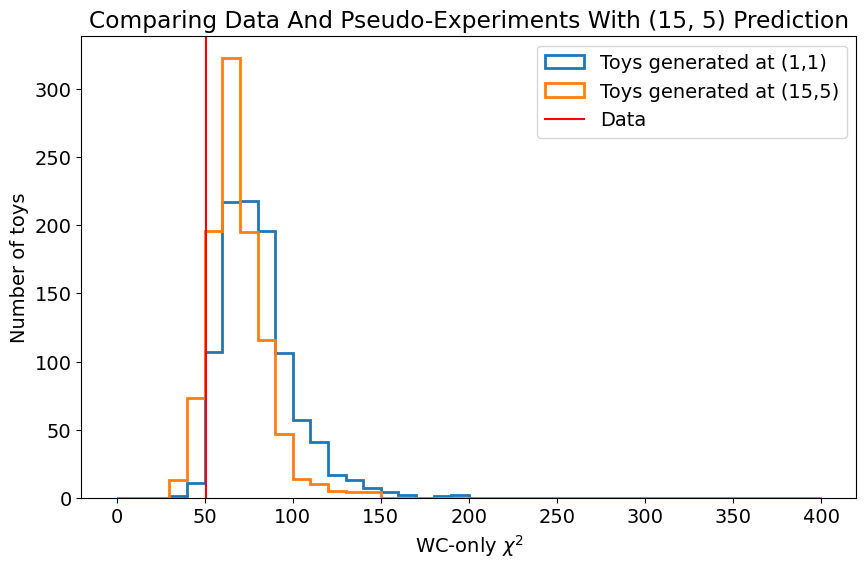

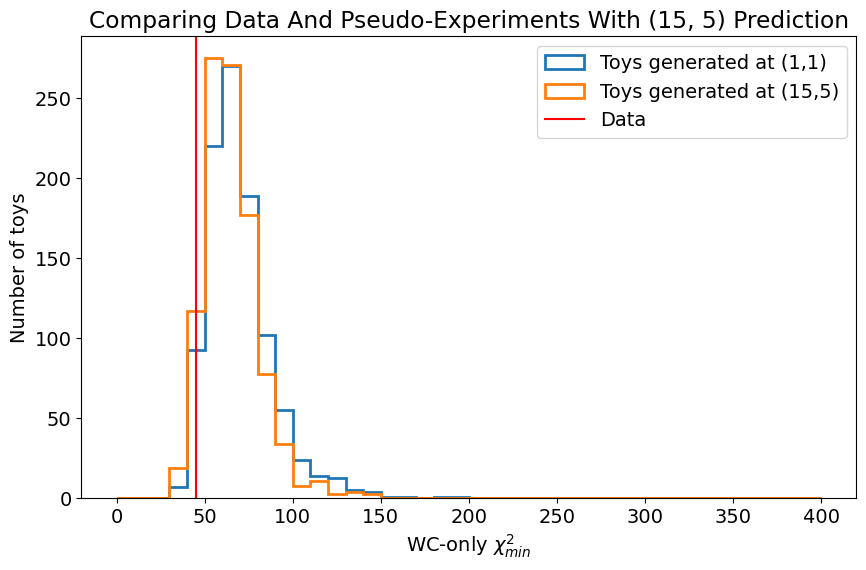

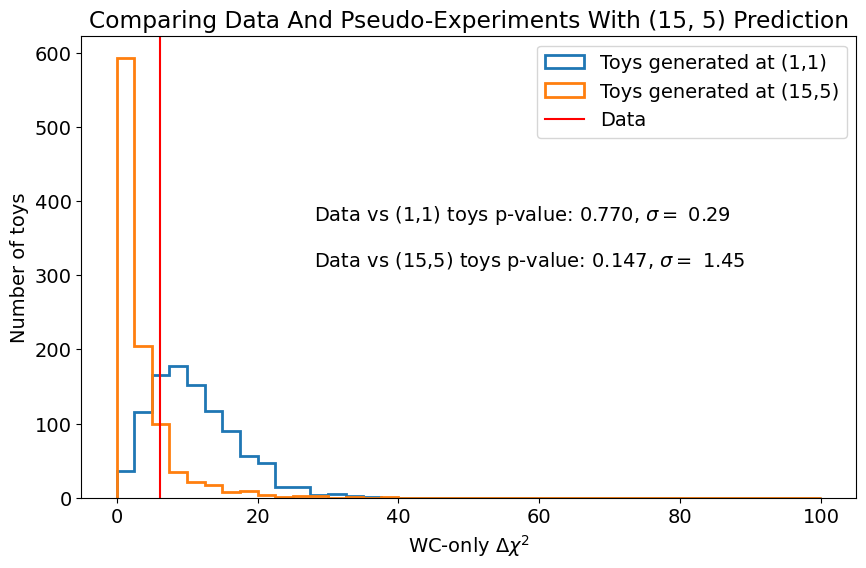

In [7]:
bins = np.linspace(0, 400, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_chi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_chi2_min_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_{min}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 100, 41)

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_dchi2_value, color='r', label='Data')

plt.text(0.3, 0.6, rf"Data vs (1,1) toys p-value: {data_1_1_dchi2_pval:.3f}, $\sigma=$ {get_significance(data_1_1_dchi2_pval):.2f}", transform=plt.gca().transAxes)
plt.text(0.3, 0.5, f"Data vs (15,5) toys p-value: {data_15_5_dchi2_pval:.3f}, $\sigma=$ {get_significance(data_15_5_dchi2_pval):.2f}", transform=plt.gca().transAxes)

plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()


# Constrained Chi2

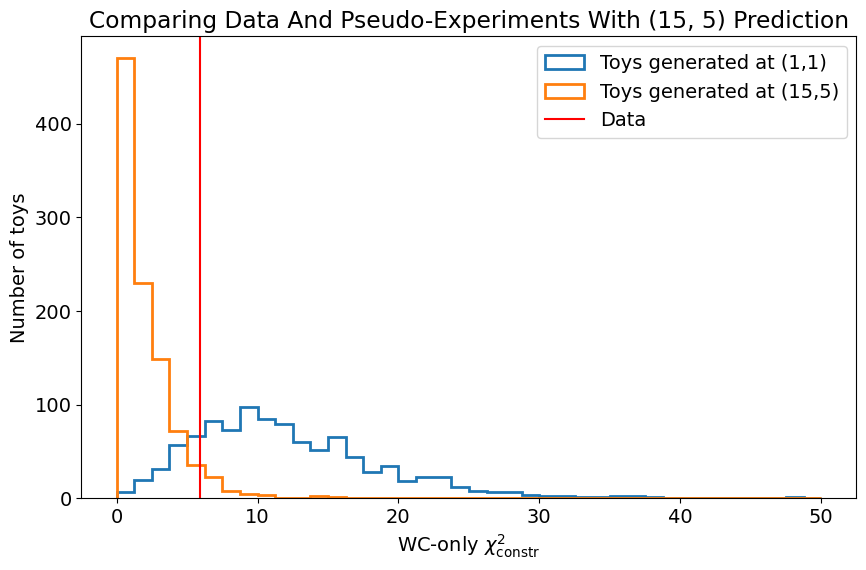

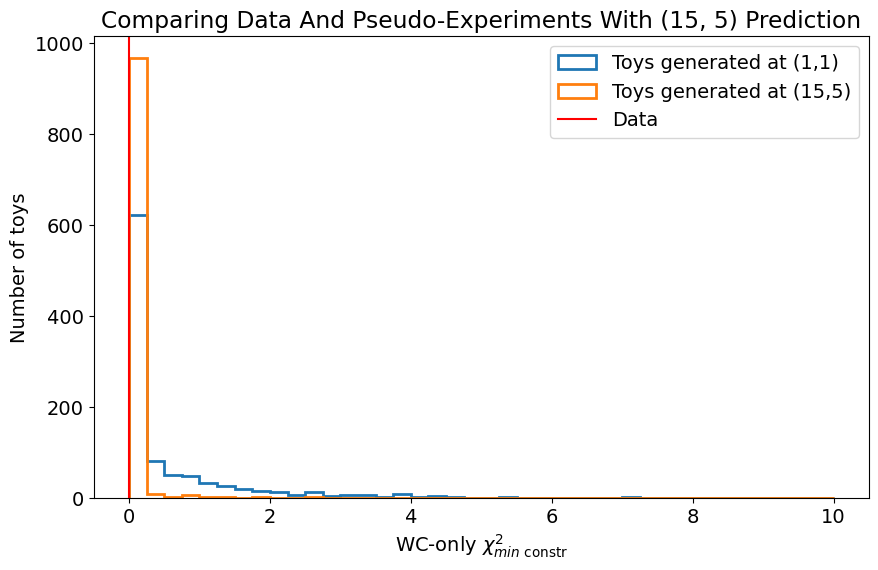

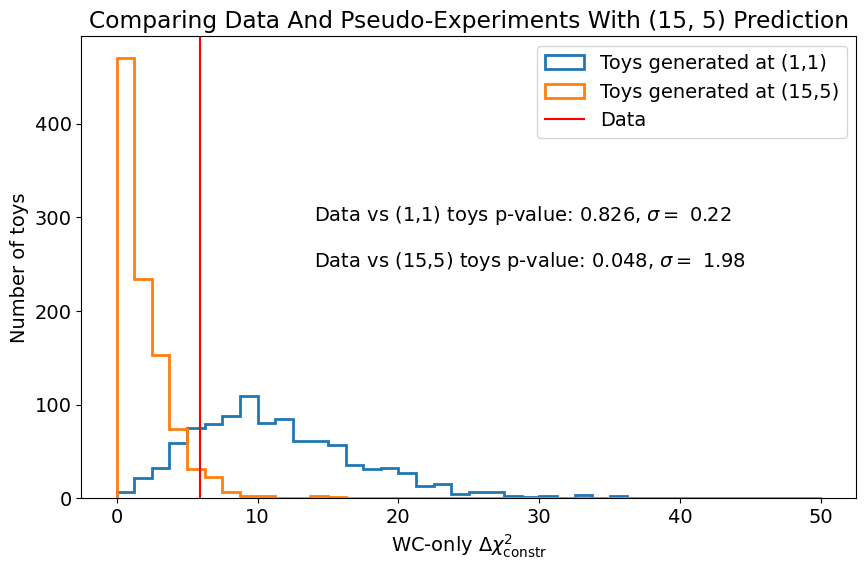

In [8]:
bins = np.linspace(0, 50, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))
plt.hist(constr_toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(constr_toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(constr_data_15_5_chi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_\mathrm{constr}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 10, 41)

plt.figure(figsize=(10, 6))
plt.hist(constr_toy_1_1_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(constr_toy_15_5_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(constr_data_15_5_chi2_min_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_{min\ \mathrm{constr}}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 50, 41)

plt.figure(figsize=(10, 6))
plt.hist(constr_toy_1_1_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(constr_toy_15_5_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(constr_data_15_5_dchi2_value, color='r', label='Data')

plt.text(0.3, 0.6, rf"Data vs (1,1) toys p-value: {constr_data_1_1_dchi2_pval:.3f}, $\sigma=$ {get_significance(constr_data_1_1_dchi2_pval):.2f}", transform=plt.gca().transAxes)
plt.text(0.3, 0.5, f"Data vs (15,5) toys p-value: {constr_data_15_5_dchi2_pval:.3f}, $\sigma=$ {get_significance(constr_data_15_5_dchi2_pval):.2f}", transform=plt.gca().transAxes)

plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2_\mathrm{constr}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()


# Joint Chi2 vs Constrained Chi2

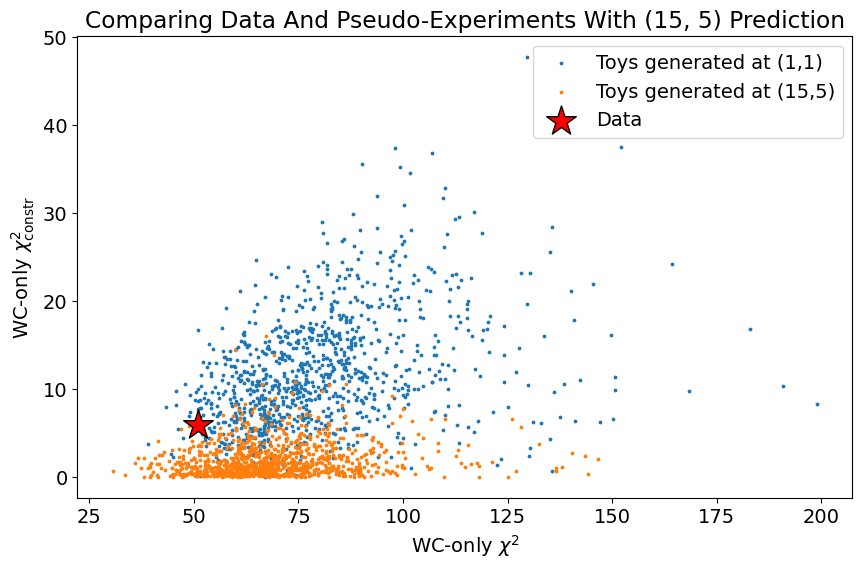

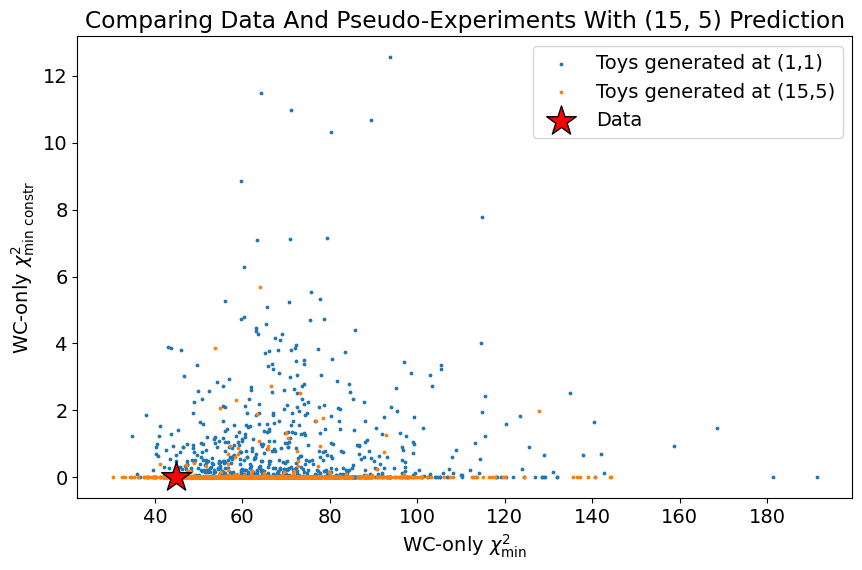

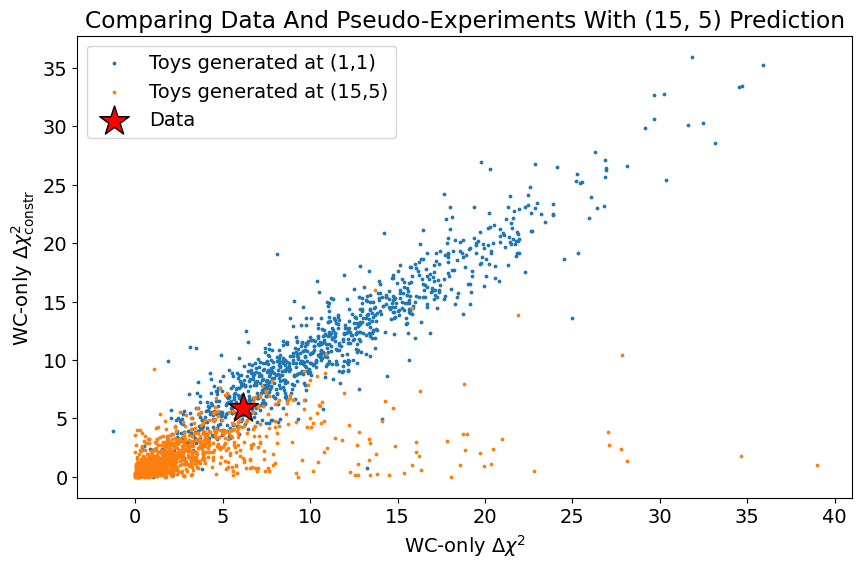

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(toy_1_1_15_5_chi2_values, constr_toy_1_1_15_5_chi2_values, label='Toys generated at (1,1)', s=3)
plt.scatter(toy_15_5_15_5_chi2_values, constr_toy_15_5_15_5_chi2_values, label='Toys generated at (15,5)', s=3)
plt.scatter(data_15_5_chi2_value, constr_data_15_5_chi2_value, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'WC-only $\chi^2$')
plt.ylabel(r'WC-only $\chi^2_{\mathrm{constr}}$')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(toy_1_1_15_5_chi2_min_values, constr_toy_1_1_15_5_chi2_min_values, label='Toys generated at (1,1)', s=3)
plt.scatter(toy_15_5_15_5_chi2_min_values, constr_toy_15_5_15_5_chi2_min_values, label='Toys generated at (15,5)', s=3)
plt.scatter(data_15_5_chi2_min_value, constr_data_15_5_chi2_min_value, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_{\mathrm{min}}$')
plt.ylabel(r'WC-only $\chi^2_{\mathrm{min\ constr}}$')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(toy_1_1_15_5_dchi2_values, constr_toy_1_1_15_5_dchi2_values, label='Toys generated at (1,1)', s=3)
plt.scatter(toy_15_5_15_5_dchi2_values, constr_toy_15_5_15_5_dchi2_values, label='Toys generated at (15,5)', s=3)
plt.scatter(data_15_5_dchi2_value, constr_data_15_5_dchi2_value, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2$')
plt.ylabel(r'WC-only $\Delta \chi^2_{\mathrm{constr}}$')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()


# Minimization Points

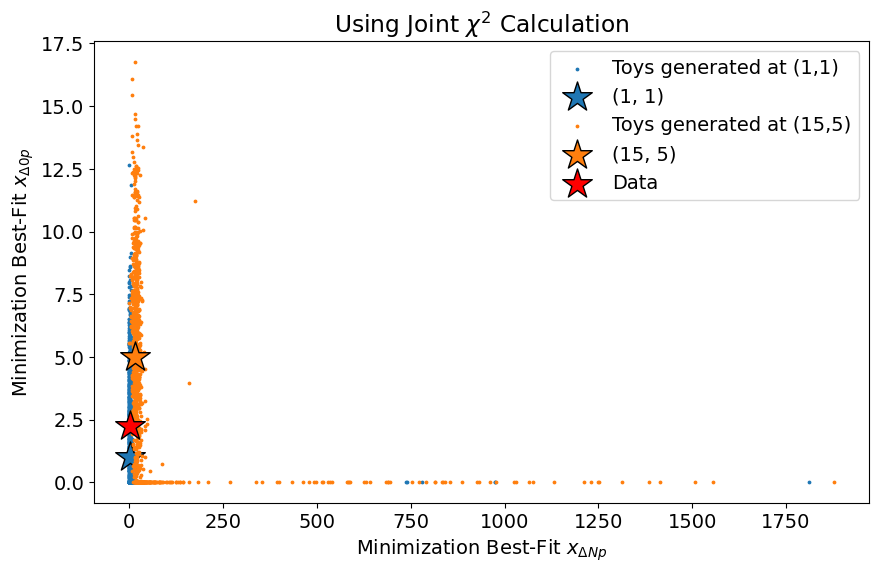

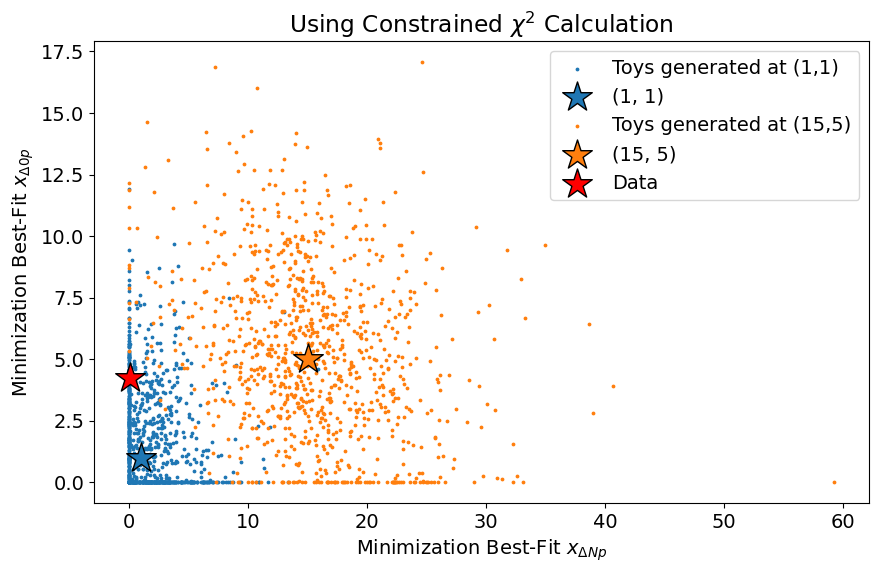

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(toy_1_1_15_5_min_Np_points, toy_1_1_15_5_min_0p_points, label='Toys generated at (1,1)', s=3)
plt.scatter(1, 1, color='tab:blue', label='(1, 1)', marker='*', s=500, edgecolors='k')
plt.scatter(toy_15_5_15_5_min_Np_points, toy_15_5_15_5_min_0p_points, label='Toys generated at (15,5)', s=3)
plt.scatter(15, 5, color='tab:orange', label='(15, 5)', marker='*', s=500, edgecolors='k')
plt.scatter(data_15_5_min_Np_point, data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'Minimization Best-Fit $x_{\Delta Np}$')
plt.ylabel(r'Minimization Best-Fit $x_{\Delta 0p}$')
plt.title(r"Using Joint $\chi^2$ Calculation")
#plt.xlim(0, 100)
#plt.ylim(0, 20)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(constr_toy_1_1_15_5_min_Np_points, constr_toy_1_1_15_5_min_0p_points, label='Toys generated at (1,1)', s=3)
plt.scatter(1, 1, color='tab:blue', label='(1, 1)', marker='*', s=500, edgecolors='k')
plt.scatter(constr_toy_15_5_15_5_min_Np_points, constr_toy_15_5_15_5_min_0p_points, label='Toys generated at (15,5)', s=3)
plt.scatter(15, 5, color='tab:orange', label='(15, 5)', marker='*', s=500, edgecolors='k')
plt.scatter(constr_data_15_5_min_Np_point, constr_data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'Minimization Best-Fit $x_{\Delta Np}$')
plt.ylabel(r'Minimization Best-Fit $x_{\Delta 0p}$')
plt.title(r"Using Constrained $\chi^2$ Calculation")
#plt.xlim(0, 100)
#plt.ylim(0, 20)
plt.show()


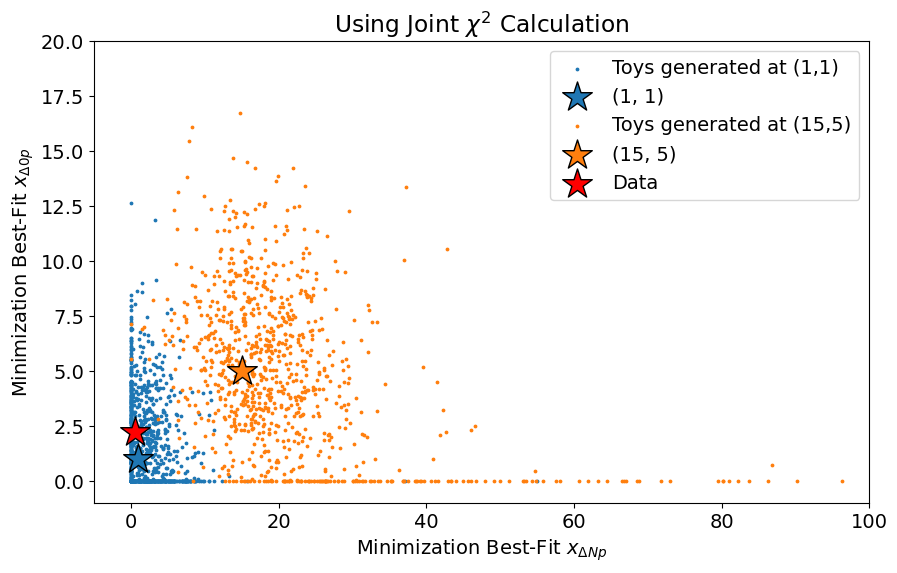

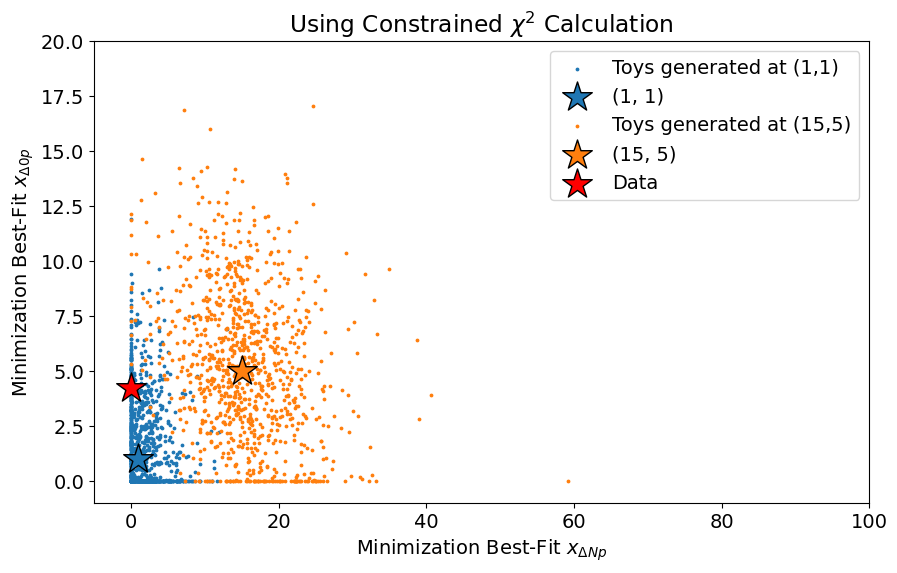

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(toy_1_1_15_5_min_Np_points, toy_1_1_15_5_min_0p_points, label='Toys generated at (1,1)', s=3)
plt.scatter(1, 1, color='tab:blue', label='(1, 1)', marker='*', s=500, edgecolors='k')
plt.scatter(toy_15_5_15_5_min_Np_points, toy_15_5_15_5_min_0p_points, label='Toys generated at (15,5)', s=3)
plt.scatter(15, 5, color='tab:orange', label='(15, 5)', marker='*', s=500, edgecolors='k')
plt.scatter(data_15_5_min_Np_point, data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'Minimization Best-Fit $x_{\Delta Np}$')
plt.ylabel(r'Minimization Best-Fit $x_{\Delta 0p}$')
plt.title(r"Using Joint $\chi^2$ Calculation")
plt.xlim(-5, 100)
plt.ylim(-1, 20)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(constr_toy_1_1_15_5_min_Np_points, constr_toy_1_1_15_5_min_0p_points, label='Toys generated at (1,1)', s=3)
plt.scatter(1, 1, color='tab:blue', label='(1, 1)', marker='*', s=500, edgecolors='k')
plt.scatter(constr_toy_15_5_15_5_min_Np_points, constr_toy_15_5_15_5_min_0p_points, label='Toys generated at (15,5)', s=3)
plt.scatter(15, 5, color='tab:orange', label='(15, 5)', marker='*', s=500, edgecolors='k')
plt.scatter(constr_data_15_5_min_Np_point, constr_data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'Minimization Best-Fit $x_{\Delta Np}$')
plt.ylabel(r'Minimization Best-Fit $x_{\Delta 0p}$')
plt.title(r"Using Constrained $\chi^2$ Calculation")
plt.xlim(-5, 100)
plt.ylim(-1, 20)
plt.show()


In [11]:
print(1/0)

ZeroDivisionError: division by zero

# Investigating large mismatch point

In [ ]:
print(toy_15_5_15_5_dchi2_values[toy_15_5_15_5_dchi2_values > 35])

"""
# joint:
(15, 5) toy #283 fake data: 109 0 205 0 155 0 269 0 0 20 251 490 606 571 515 390 386 69 87 67 55 52 20 46 0 208 1028 945 802 480 383 161 51 82 39 36 2 21 5 32 0 9 126 768 1643 2591 3162 3168 2964 2397 1755 1505 1084 744 472 1096 15 28 675 1758 1998 2056 1818 1710 1529 1249 1018 894 518 253 383 614 
(15, 5) toy #283 vs (15, 5) chi2 = 89.7803
(15, 5) toy #283 vs (15, 5) chi2_min = 50.7839
(15, 5) toy #283 vs (15, 5) dchi2 = 38.9964

# constrained:
(15, 5) toy #283 fake data: 109 0 205 0 155 0 269 0 0 20 251 490 606 571 515 390 386 69 87 67 55 52 20 46 0 208 1028 945 802 480 383 161 51 82 39 36 2 21 5 32 0 9 126 768 1643 2591 3162 3168 2964 2397 1755 1505 1084 744 472 1096 15 28 675 1758 1998 2056 1818 1710 1529 1249 1018 894 518 253 383 614 
(15, 5) toy #283 vs (15, 5) chi2 = 1.03548
(15, 5) toy #283 vs (15, 5) chi2_min = 2.44654e-12
(15, 5) toy #283 vs (15, 5) dchi2 = 1.03548
"""


[38.9964]


'\n# joint:\n(15, 5) toy #283 fake data: 109 0 205 0 155 0 269 0 0 20 251 490 606 571 515 390 386 69 87 67 55 52 20 46 0 208 1028 945 802 480 383 161 51 82 39 36 2 21 5 32 0 9 126 768 1643 2591 3162 3168 2964 2397 1755 1505 1084 744 472 1096 15 28 675 1758 1998 2056 1818 1710 1529 1249 1018 894 518 253 383 614 \n(15, 5) toy #283 vs (15, 5) chi2 = 89.7803\n(15, 5) toy #283 vs (15, 5) chi2_min = 50.7839\n(15, 5) toy #283 vs (15, 5) dchi2 = 38.9964\n\n# constrained:\n(15, 5) toy #283 fake data: 109 0 205 0 155 0 269 0 0 20 251 490 606 571 515 390 386 69 87 67 55 52 20 46 0 208 1028 945 802 480 383 161 51 82 39 36 2 21 5 32 0 9 126 768 1643 2591 3162 3168 2964 2397 1755 1505 1084 744 472 1096 15 28 675 1758 1998 2056 1818 1710 1529 1249 1018 894 518 253 383 614 \n(15, 5) toy #283 vs (15, 5) chi2 = 1.03548\n(15, 5) toy #283 vs (15, 5) chi2_min = 2.44654e-12\n(15, 5) toy #283 vs (15, 5) dchi2 = 1.03548\n'

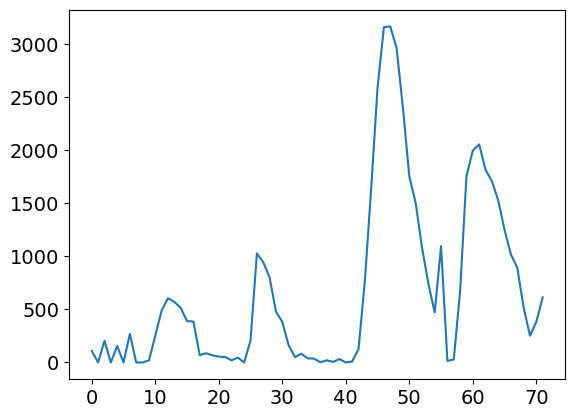

In [ ]:
weird_point_data = "109 0 205 0 155 0 269 0 0 20 251 490 606 571 515 390 386 69 87 67 55 52 20 46 0 208 1028 945 802 480 383 161 51 82 39 36 2 21 5 32 0 9 126 768 1643 2591 3162 3168 2964 2397 1755 1505 1084 744 472 1096 15 28 675 1758 1998 2056 1818 1710 1529 1249 1018 894 518 253 383 614".split()
weird_point_data = [int(x) for x in weird_point_data]

plt.plot(weird_point_data)


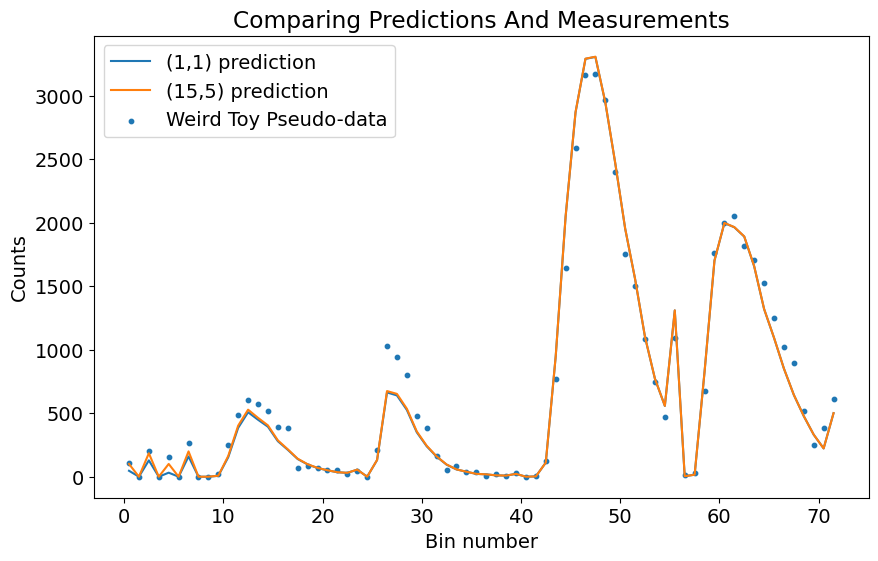

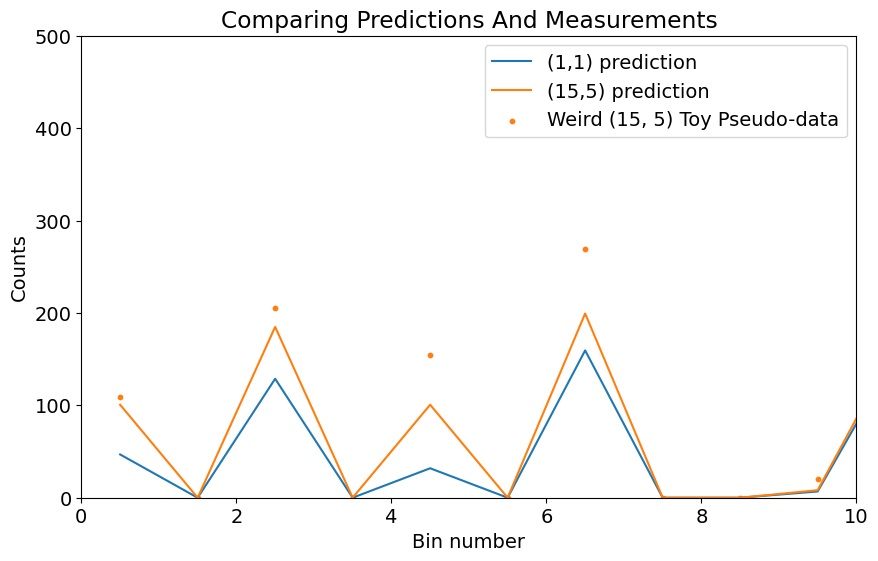

In [ ]:
loc = "../TLee_Np0p/cv_and_cov_csv_outputs/lee_15_5/"

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_15_5/pred_newworld.csv") as f:
    line = f.readlines()[0]
    pred_15_5 = np.array([float(x) for x in line.split(",")[:-1]])

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/pred_newworld.csv") as f:
    line = f.readlines()[0]
    pred_1_1 = np.array([float(x) for x in line.split(",")[:-1]])
        
with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_15_5/meas.csv") as f:
    line = f.readlines()[0]
    meas_15_5 = np.array([float(x) for x in line.split(",")[:-1]])

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/meas.csv") as f:
    line = f.readlines()[0]
    meas_1_1 = np.array([float(x) for x in line.split(",")[:-1]])


num_bins = len(meas_1_1)
bins = np.linspace(0, num_bins, num_bins+1)
bin_centers = (bins[1:] + bins[:-1]) / 2

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pred_1_1, label='(1,1) prediction')
plt.plot(bin_centers, pred_15_5, label='(15,5) prediction')
#plt.scatter(bin_centers, meas_1_1, label='Data', c="k", s=10)
plt.scatter(bin_centers, weird_point_data, label="Weird Toy Pseudo-data", s=10)
plt.legend()
plt.xlabel('Bin number')
plt.ylabel('Counts')
plt.title("Comparing Predictions And Measurements")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pred_1_1, label='(1,1) prediction')
plt.plot(bin_centers, pred_15_5, label='(15,5) prediction')
#plt.scatter(bin_centers, meas_1_1, label='Data', c="k", s=10)
plt.scatter(bin_centers, weird_point_data, label="Weird (15, 5) Toy Pseudo-data", s=10, c="tab:orange")
plt.legend()
plt.xlabel('Bin number')
plt.ylabel('Counts')
plt.title("Comparing Predictions And Measurements")
plt.xlim(0, 10)
plt.ylim(0, 500)
plt.show()


## Making 2D Chi2 Map For This Point

In [ ]:
# import the 0p and Np sig counts to build a 2D map of predictions (verify that it matches (1,1) and (15,5))
# look at the chi2 map for the weird point
